In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

## Camera Calibration

### 1. Briefly state how you computed the camera matrix and distortion coefficients. 



Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
Provide an example of a distortion corrected calibration image.

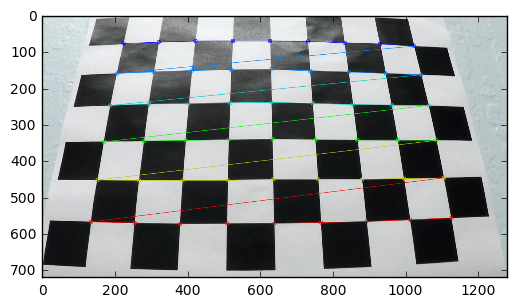

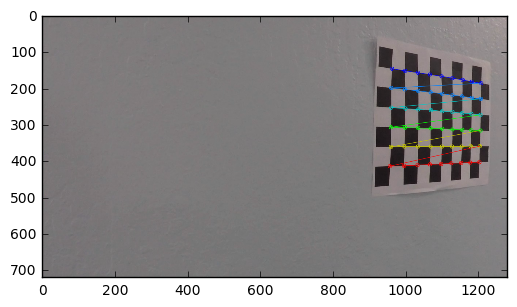

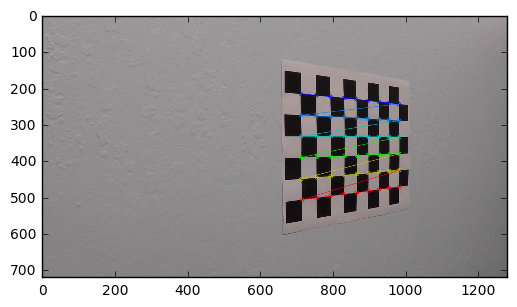

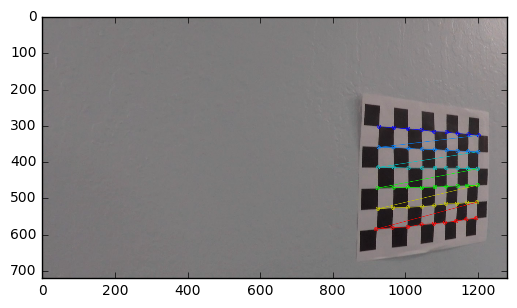

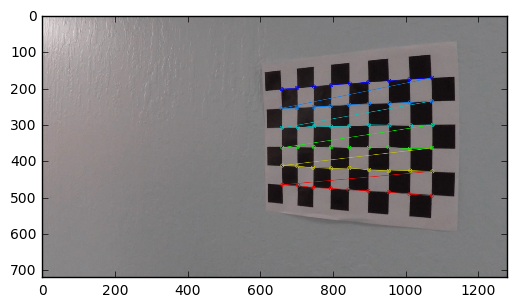

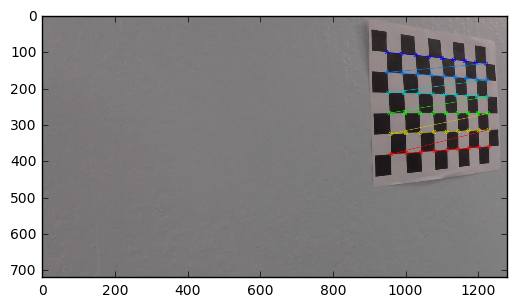

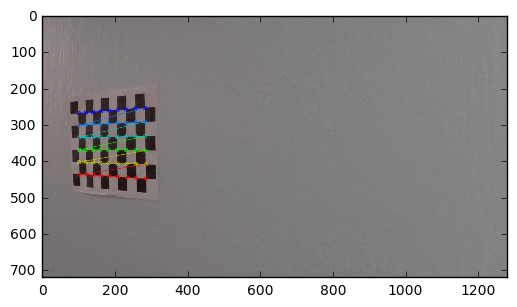

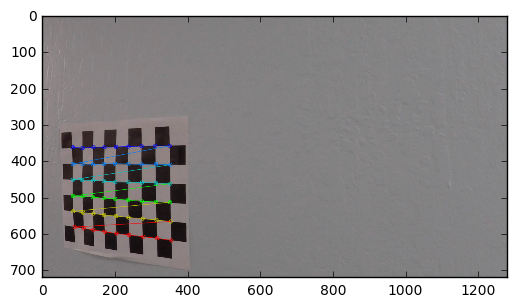

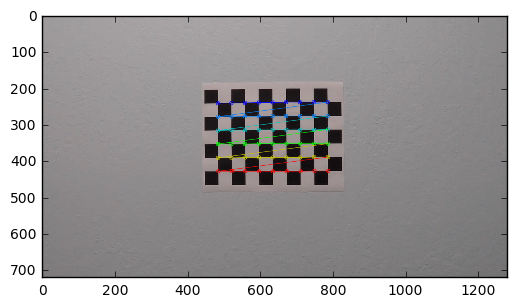

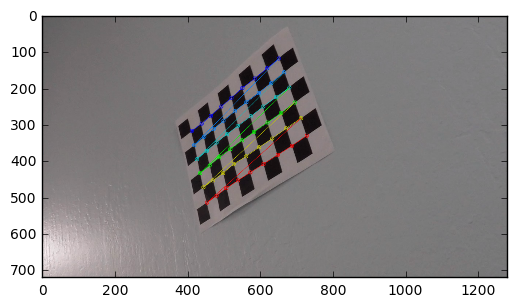

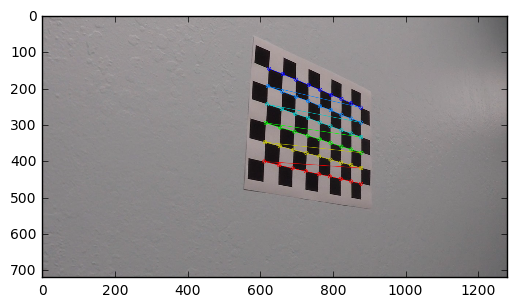

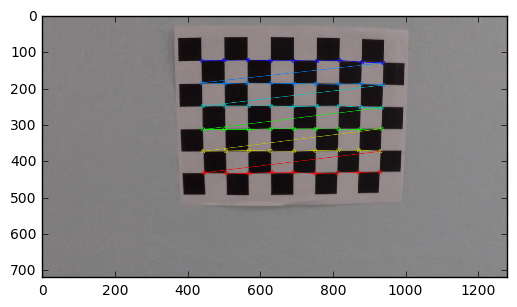

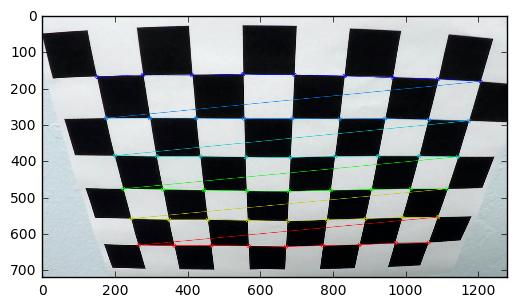

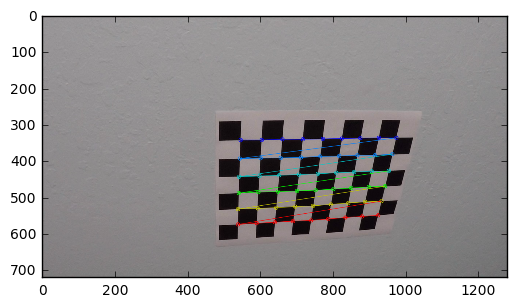

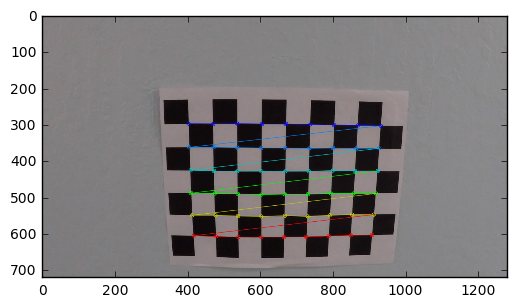

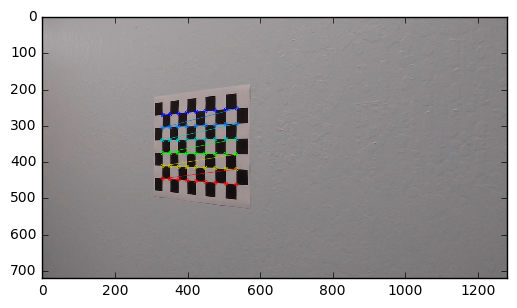

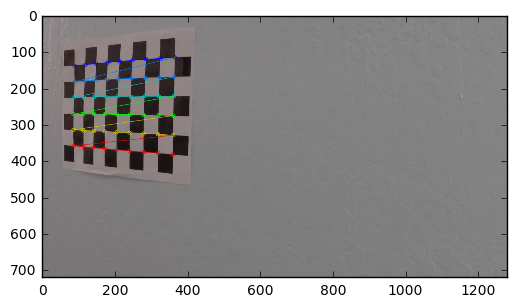

In [2]:

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        plt.show()
        

ret, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)
def cal_undistort(img, cameraMatrix, distCoeffs):
    # Use cv2.calibrateCamera() and cv2.undistort()
    undist = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix)
    return undist



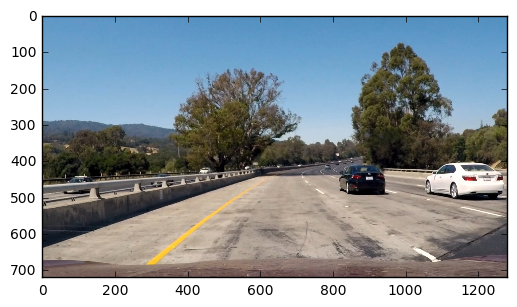

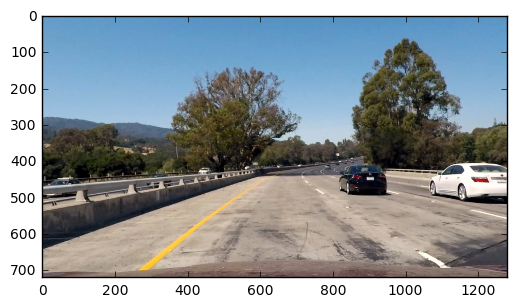

In [3]:
example_image = plt.imread('./test_images/test1.jpg')
plt.imshow(example_image)
plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)
plt.show()

#### 2. Creating a thresholded binary image.

In [4]:
class WidgetCom:
    """ Stores data for handling with interactive widget """
    value = dict()
WidgetCom.value['mutex'] = False
WidgetCom.value['image'] = img_undist
WidgetCom.value['H_chan_min'] = 10
WidgetCom.value['H_chan_max'] = 30
WidgetCom.value['S_chan_min'] = 60
WidgetCom.value['V_chan_min'] = 80
WidgetCom.value['gray_min'] = 190
WidgetCom.value['sobel_angle_min'] = -15.0
WidgetCom.value['sobel_angle_max'] = 15.0
WidgetCom.value['sobel_mag'] = 70
WidgetCom.value['image'] = img_undist
# Hmin : 15
# Hmax : 30
# Smin : 60
# Vmin : 80
# gray : 190

In [5]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html
# Using widget to help calibrating computer vision parameters
    
def handle_slider_h_chan_min_change(change):
    WidgetCom.value['H_chan_min'] = change.new
    display_image()    
        
def handle_slider_h_chan_max_change(change):
    WidgetCom.value['H_chan_max'] = change.new
    display_image()
    
def handle_slider_s_chan_change(change):
    WidgetCom.value['S_chan_min'] = change.new
    display_image()
    
def handle_slider_v_chan_change(change):
    WidgetCom.value['V_chan_min'] = change.new
    display_image()
    
def handle_slider_gray_min_change(change):
    WidgetCom.value['gray_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_min_change(change):
    WidgetCom.value['sobel_angle_min'] = change.new
    display_image()
    
def handle_slider_sobel_angle_max_change(change):
    WidgetCom.value['sobel_angle_max'] = change.new
    display_image()
    
def handle_slider_sobel_mag_change(change):
    WidgetCom.value['sobel_mag'] = change.new
    display_image()
    
from ipywidgets import widgets
slider_h_min_chan = widgets.IntSlider(min=0, max=128, value=WidgetCom.value['H_chan_min'], description='H min')
slider_h_max_chan = widgets.IntSlider(min=0, max=128, value=WidgetCom.value['H_chan_max'], description='H max')
slider_s_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['S_chan_min'], description='S min')
slider_v_chan = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['V_chan_min'], description='V min')
slider_gray_min = widgets.IntSlider(min=0, max=255, value=WidgetCom.value['gray_min'], description='gray')
slider_sobel_angle_min = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_min'], description='sobel angle min')
slider_sobel_angle_max = widgets.FloatSlider(min=-45, max=45, value=WidgetCom.value['sobel_angle_max'], description='sobel angle max')
slider_sobel_mag = widgets.FloatSlider(min=0.1, max=100, value=WidgetCom.value['sobel_mag'], description='sobel mag')

slider_h_min_chan.observe(handle_slider_h_chan_min_change, names='value')
slider_h_max_chan.observe(handle_slider_h_chan_max_change, names='value')
slider_s_chan.observe(handle_slider_s_chan_change, names='value')
slider_v_chan.observe(handle_slider_v_chan_change, names='value')
slider_gray_min.observe(handle_slider_gray_min_change, names='value')
slider_sobel_angle_min.observe(handle_slider_sobel_angle_min_change, names='value')
slider_sobel_angle_max.observe(handle_slider_sobel_angle_max_change, names='value')
slider_sobel_mag.observe(handle_slider_sobel_mag_change, names='value')

In [6]:
# Let's get the yellow in the image
def segment_image(img_undist, S_chan_min, 
                 V_chan_min, gray_min):
    img_hsv = cv2.cvtColor(img_undist, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([WidgetCom.value['H_chan_min'], S_chan_min, V_chan_min], np.uint8)
    upper_yellow = np.array([WidgetCom.value['H_chan_max'], 255, 255], np.uint8)

    # Calculate mask for color segmentation
    mask = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
    im_yellow = cv2.bitwise_and(img_undist,img_undist, mask= mask)
    
    # Let's detect gray from image
    max_image = np.max(img_undist)
    gray_thres = 18
    img_undist16 = img_undist.astype('int16')
    bg = np.abs(img_undist16[:,:,0] - img_undist16[:,:,1])< gray_thres # B == G
    gr = np.abs(img_undist16[:,:,2] - img_undist16[:,:,1])< gray_thres # G == R
    gray_slice = np.bitwise_and(bg, gr).astype('uint8')
    
    # Let's get the white from the image
    lower_white = gray_min*np.array([1, 1, 1], np.uint8)
    upper_white = np.array([255, 255, 255], np.uint8)

    mask = cv2.inRange(img_undist, lower_white, upper_white)
    im_white = cv2.bitwise_and(img_undist,img_undist, mask= mask)
    im_white = cv2.bitwise_and(im_white,im_white, mask= gray_slice)
    return np.clip(im_white.astype('uint16')/2+ im_yellow.astype('uint16')/2,
                   0,255).astype('uint8')

def sobel_angle_image(img, thresh_min, thresh_max, mag_thresh):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mask_mag = np.zeros_like(gradmag).astype('uint8')
    mask_mag[gradmag >= mag_thresh] = 1
    
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    absgraddir = np.float32(absgraddir)*180.0/np.pi
    #binary_output =  np.zeros_like(absgraddir).astype('uint8')
    direction_im = np.bitwise_and((absgraddir>thresh_min).astype('uint8'),
                                   (absgraddir<thresh_max).astype('uint8')).astype('uint8')
    
    binary_output = cv2.bitwise_and(direction_im,mask_mag, mask=mask_mag)
    
    #print('thresh_min:',thresh_min,'thresh_max:', thresh_max)
    #print('absgraddir:',np.max(absgraddir),np.min(absgraddir))
    #print('direction_im',np.max(direction_im),np.min(direction_im))
    return binary_output*1.0



# Let's get the yellow in the image


import time
from IPython import display
def compute_image(image):
    S_chan_min = WidgetCom.value['S_chan_min']
    V_chan_min = WidgetCom.value['V_chan_min']
    gray_min =   WidgetCom.value['gray_min']
    thresh_min = WidgetCom.value['sobel_angle_min']
    thresh_max = WidgetCom.value['sobel_angle_max']
    mag_thresh = WidgetCom.value['sobel_mag']
    img = segment_image(image, S_chan_min, V_chan_min, gray_min)
    edge_img = sobel_angle_image(img, thresh_min, thresh_max, mag_thresh)
    return img, edge_img
        
def display_image():
    if WidgetCom.value['mutex'] == False:
        WidgetCom.value['mutex'] = True
        
        img, edge_img = compute_image(WidgetCom.value['image'])

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(1, 3, 1)
        plt.title('Original Image')
        ax.imshow(WidgetCom.value['image'])
        ax = fig.add_subplot(1, 3, 2)
        plt.title('Masked Image')
        ax.imshow(img)
        ax = fig.add_subplot(1, 3, 3)
        ax.imshow(edge_img, cmap='gray')
        plt.title('Edges')
        plt.show()
        plt.close(fig)
        display.clear_output(wait=True)
        WidgetCom.value['mutex'] = False
    
    

In [7]:
# Display interactive sliders
from IPython import display
from ipywidgets import HBox
display.display(HBox([slider_h_min_chan, slider_h_max_chan]))
display.display(HBox([slider_s_chan, slider_v_chan, slider_gray_min, ]))
display.display(HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag]))

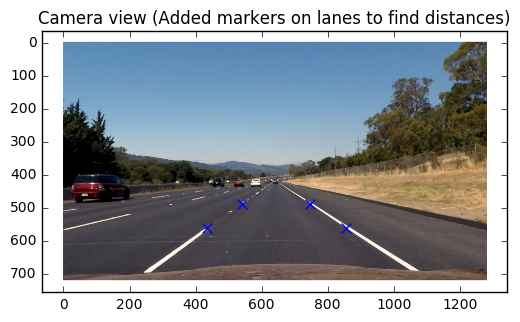


Transformation matrix: 
 [[ -5.94642857e-02  -4.75200893e-01   2.37026429e+02]
 [ -4.29344060e-17   1.11383929e-01  -7.58750000e+01]
 [  8.18572640e-18  -2.38839286e-03   1.00000000e+00]]

Transformation matrix inverse: 
 [[ -1.68168168e+01  -2.18920452e+01   2.32497110e+03]
 [ -1.39224134e-13  -1.43193895e+01  -1.08648368e+03]
 [ -1.94864065e-16  -3.42003276e-02  -1.59494986e+00]]


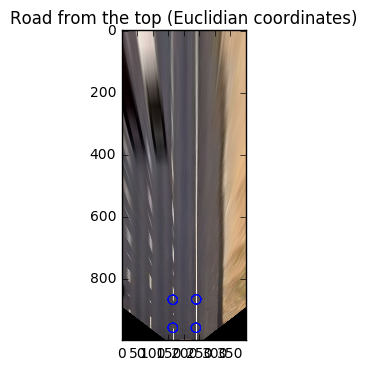

In [8]:
# Find PROJECTIVE transform for the road to find better masking region
# On an highway we could assume for this exercise (not safe in real car, just like masking with a 
# a triangle, that the lines should be fairly parallel to the direction of the vehicle.
# Minimum lane width: Minimum lane width of 12 feet (3.7 m)
# Each dashed line measures 10 feet (3.0 m), and the empty spaces in-between measure 30 feet (9.0m).


example_image = plt.imread('./test_images/straight_lines2.jpg')
#plt.imshow(example_image)
#plt.show()
img_undist = cal_undistort(example_image, cameraMatrix, distCoeffs)
plt.imshow(img_undist)

image_proj_work = img_undist.copy()
plt.imshow(image_proj_work)
plt.title('Camera view (Added markers on lanes to find distances)')

# Mark known points in image
points_px = np.float32( [ [436, 560], [540, 488],   [856, 560], [746, 488] ] )
plt.scatter(points_px[0][0], points_px[0][1], s=50, c='blue', marker='x')
plt.scatter(points_px[1][0], points_px[1][1], s=50, c='blue', marker='x')
plt.scatter(points_px[2][0], points_px[2][1], s=50, c='blue', marker='x')
plt.scatter(points_px[3][0], points_px[3][1], s=50, c='blue', marker='x')
plt.show()

# Points in meters
pt_distance_to_car = 4.0
dash_line_len = 9.0
lane_width = 3.7
center_of_car = 20
points_dest_px = np.float32( [ [center_of_car-lane_width, pt_distance_to_car],
                        [center_of_car-lane_width, pt_distance_to_car+dash_line_len],
                        [center_of_car+lane_width, pt_distance_to_car],
                        [center_of_car+lane_width, pt_distance_to_car+dash_line_len] ] )
meters_to_px = 10.0
points_m = meters_to_px * points_dest_px

transfM = cv2.getPerspectiveTransform(points_px,points_m)
print('\nTransformation matrix: \n', transfM)

transfMInv = np.linalg.inv(transfM)
print('\nTransformation matrix inverse: \n', transfMInv)

wrappedIm = cv2.warpPerspective(image_proj_work, transfM, (center_of_car*2*int(meters_to_px),1000))


plt.imshow(wrappedIm)
plt.title('Road from the top (Euclidian coordinates)')

#cv2.imwrite('foo.png',wrappedIm)
radius = 15
color_circle = (0,0,255)
thickness = 4
wrappedIm_copy = wrappedIm.copy()

for line in range(points_px.shape[0]):
    points_dest_px2 = np.matmul(transfM, np.concatenate((points_px[line],[1]), axis=0)[np.newaxis].T)
    points_dest_px2 = points_dest_px2/points_dest_px2[2]
    wrappedIm = cv2.circle(wrappedIm, tuple(points_dest_px2[0:2]), radius, color_circle,thickness)

wrappedIm = cv2.flip(wrappedIm,0) #Vertical flip

plt.imshow(wrappedIm)
plt.show()


In [9]:
# Saving calibration data in "static" object for kater global access
class CameraCalibration:
    """
    Saving calibration data in "static" object for kater global access.
    Description of the dictionary field 'value' 
        cameraMatrix: camera matrix
        distCoeffs : camera distorsion coefficients
        transfM : transformation matrix (from pixels to 0.1 meters on the road), use on undistorted image
        transfMInv : transformation matrix inverse (from pixels to 0.1 meters on the road)
        center_of_car : Lateral position of car in the lane
    """
    value = dict()
    def undistort(img):
        """
        Undistort image using the cameraMatrix and the distorsion coefficients
        """
        undist = cv2.undistort(img, CameraCalibration.value['cameraMatrix'], 
                               CameraCalibration.value['distCoeffs'], None,
                               CameraCalibration.value['cameraMatrix'])
        return undist
    def birdview(img):
        """
        Apply wrap perspective transform to undistorted image
        """
        wrappedIm = cv2.warpPerspective(img, CameraCalibration.value['transfM'], 
                                        (CameraCalibration.value['center_of_car'] * 
                                         2*int(CameraCalibration.value['meters_to_px']),500))
        return wrappedIm

# Initialize camera calibration parameter (see parameter definitions above)
CameraCalibration.value['cameraMatrix'] = cameraMatrix
CameraCalibration.value['distCoeffs'] = distCoeffs
CameraCalibration.value['transfM'] = transfM
CameraCalibration.value['transfMInv'] = transfMInv
CameraCalibration.value['center_of_car'] = center_of_car 
CameraCalibration.value['meters_to_px'] = meters_to_px 


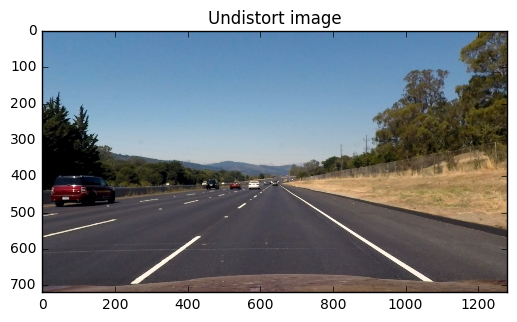

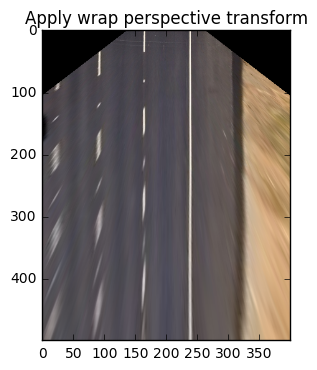

In [10]:
# Testing undistort function
plt.imshow(CameraCalibration.undistort(example_image))
plt.title('Undistort image')
plt.show()
plt.imshow(CameraCalibration.birdview(CameraCalibration.undistort(example_image)))
plt.title('Apply wrap perspective transform')
plt.show()

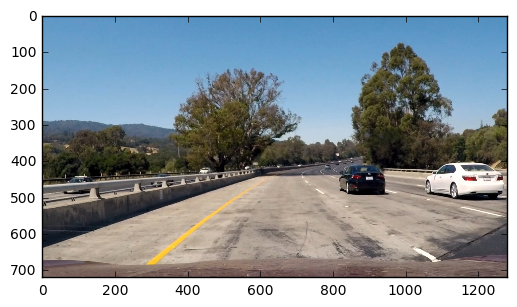

In [11]:
example_image = plt.imread('./test_images/test1.jpg')
#example_image = plt.imread('./test_images/test2.jpg')
#example_image = plt.imread('./test_images/straight_lines2.jpg')
plt.imshow(example_image)
plt.show()

In [12]:

from ipywidgets import HBox
WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(example_image))
boxColor = HBox([slider_h_min_chan, slider_h_max_chan])
boxSV = HBox([slider_s_chan, slider_v_chan,slider_gray_min])
boxSobel = HBox([slider_sobel_angle_min, slider_sobel_angle_max, slider_sobel_mag])

display.display(boxColor,boxSV, boxSobel)

In [13]:
# Hmin : 15
# Hmax : 30
# Smin : 60
# Vmin : 80
# gray : 190
# 

./test_images/straight_lines2.jpg


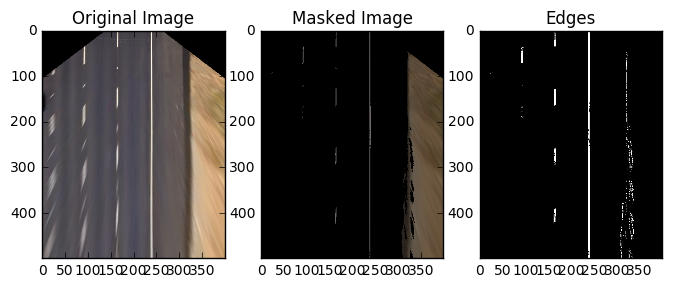

./test_images/test1.jpg


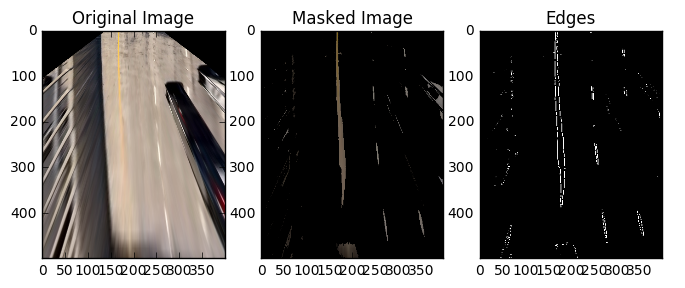

./test_images/test6.jpg


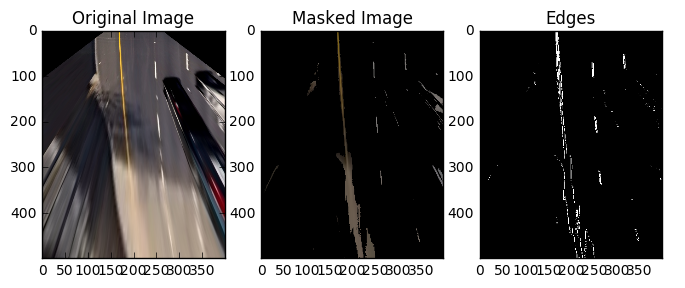

./test_images/test3.jpg


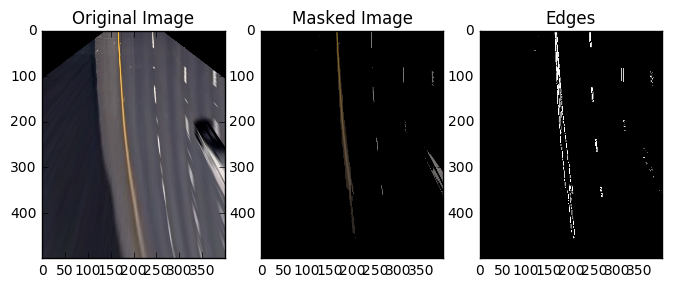

./test_images/test2.jpg


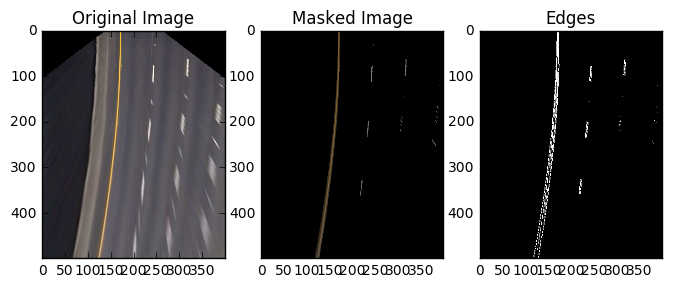

./test_images/test5.jpg


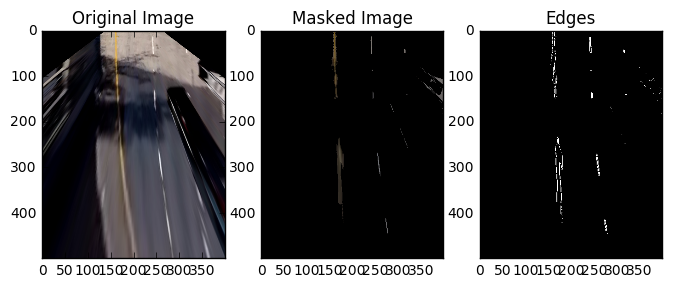

./test_images/test4.jpg


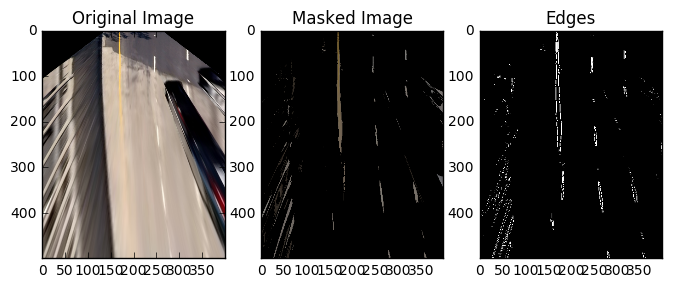

./test_images/straight_lines1.jpg


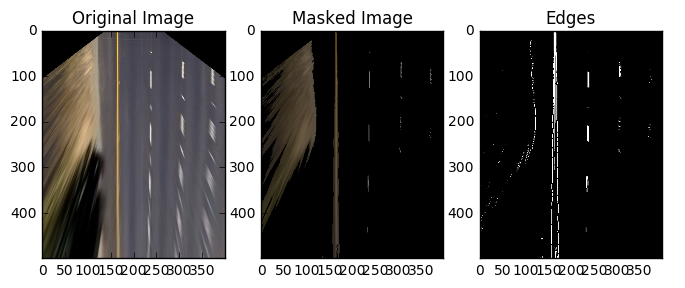

In [14]:
## Display all test images
list_images = glob.glob('./test_images/*.jpg')

for image_file in list_images:
    print(image_file)
    image = plt.imread(image_file)
    WidgetCom.value['image'] = CameraCalibration.birdview(CameraCalibration.undistort(image))

    img, edge_img = compute_image(WidgetCom.value['image'])

    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 3, 1)
    plt.title('Original Image')
    ax.imshow(WidgetCom.value['image'])
    ax = fig.add_subplot(1, 3, 2)
    plt.title('Masked Image')
    ax.imshow(img)
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(edge_img, cmap='gray')
    plt.title('Edges')
    plt.show()
    plt.close(fig)

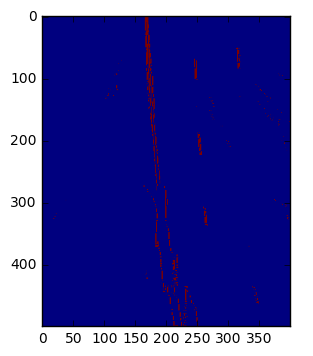

Image shape: (500, 400)


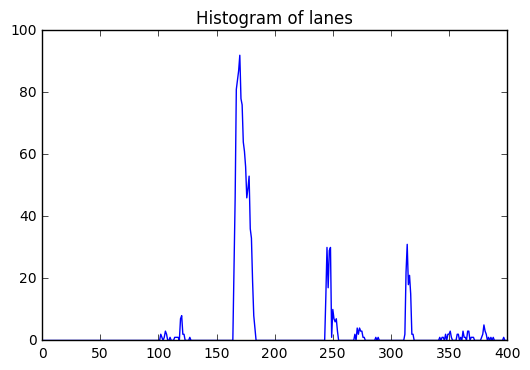

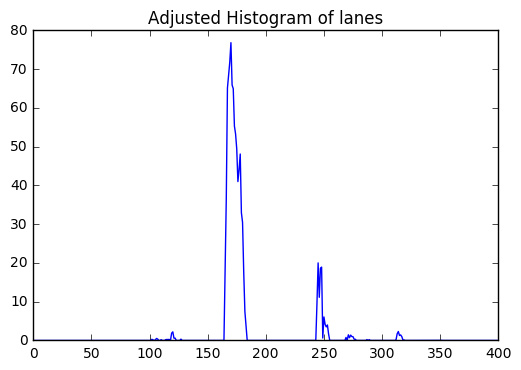

Left lane position : 170
Right lane position : 245


In [61]:


image = plt.imread('./test_images/test6.jpg')
birdview_img = CameraCalibration.birdview(CameraCalibration.undistort(image))
img, edge_img = compute_image(birdview_img)

def find_lanes_peaks(edge_img,debug=False):
    binary_warped = edge_img.astype('uint8')
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    #histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    #histogram = np.sum(binary_warped[binary_warped.shape[1]//2:,:], axis=0)
    histogram = np.sum(binary_warped[:binary_warped.shape[1]//2,:], axis=0)

    
    if debug:
        plt.imshow(binary_warped)
        plt.show()
        print('Image shape:',binary_warped.shape)
        plt.plot(histogram)
        plt.title('Histogram of lanes')
        plt.show()
        
    x = np.arange(histogram.shape[0])

    def gaussian(x, mu, sig):
        return np.exp(-np.square(x - mu) / (2 * np.square(sig)))

    histogram = histogram*(gaussian(x,histogram.shape[0]/2,50))

    if debug:
        plt.plot(x,histogram)
        plt.title('Adjusted Histogram of lanes')
        plt.show()

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    if debug:
        print('Left lane position :',leftx_base)
        print('Right lane position :',rightx_base)
    
    return binary_warped, leftx_base, rightx_base

binary_warped,leftx_base, rightx_base = find_lanes_peaks(edge_img,debug=True)

[  1.70854315e-04   1.93348605e-02   1.68452426e+02]
[ -3.71999870e-04   1.94762589e-01   2.32737480e+02]
[  1.70854315e-04   1.93348605e-02   1.68452426e+02]
[ -3.71999870e-04   1.94762589e-01   2.32737480e+02]


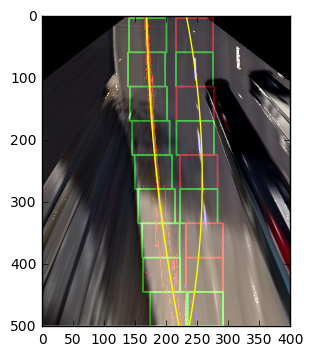

In [104]:

def lane_sliding_window(binary_warped,leftx_base, rightx_base, debug=True):
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 30
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Window color
    found_lane_color =  (0,255,0)
    no_lane_color =  (255,0,0)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

    # Step through the windows one by one
    for window in range(nwindows, -1, -1):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                          (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
                           (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)


        left_window_color =  right_window_color = no_lane_color
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            left_window_color = found_lane_color
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
            right_window_color = found_lane_color

        # Draw the windows on the visualization image
        out_img = cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),left_window_color, 2) 
        out_img = cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),right_window_color, 2) 

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)


    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    if debug:
        print(left_fit)
        print(right_fit)

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    out_img = cv2.addWeighted(out_img,0.5,birdview_img,0.9,0)

    
    return ploty, left_fit, right_fit, left_fitx, right_fitx, out_img


ploty, left_fit, right_fit, left_fitx, right_fitx, out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base)

print(left_fit)
print(right_fit)
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, binary_warped.shape[1] )
plt.ylim(binary_warped.shape[0], 0)
plt.show()

In [105]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
def poly_envelope_lane_search(binary_warped, left_fit, right_fit):
    
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    margin = 25
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    return left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty


left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty = poly_envelope_lane_search(binary_warped, left_fit, right_fit)

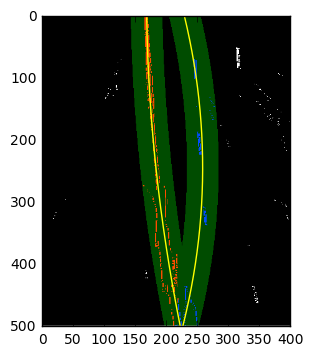

In [106]:
# Create an image to draw on and an image to show the selection window
def draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty, debug=True):
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty,rightx] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    margin = 25
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    if debug:
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, binary_warped.shape[1] )
        plt.ylim(binary_warped.shape[0], 0)


draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty)

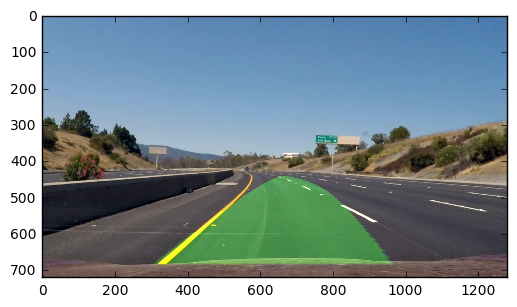

In [135]:
def add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))*0
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    color_warp = cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    #plt.imshow(color_warp)
    #plt.show()

    # Warp the blank back to original image space using inverse perspective matrix
    newwarp = cv2.warpPerspective(color_warp, CameraCalibration.value['transfMInv'], (image.shape[1], image.shape[0])) 
    
    # Combine the result with the original image
    image = cv2.addWeighted(image, 1, newwarp, 0.3, 0)
    return image
    
result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)

plt.imshow(result)
plt.show()

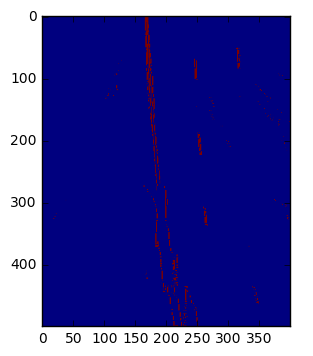

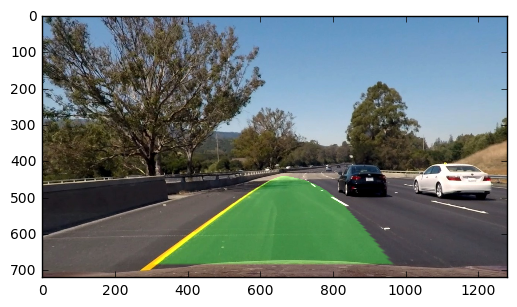

In [136]:

image = plt.imread('./test_images/test6.jpg')
def process_image(image):
    image = CameraCalibration.undistort(image)
    birdview_img = CameraCalibration.birdview(image)
    img, edge_img = compute_image(birdview_img)
    binary_warped,leftx_base, rightx_base = find_lanes_peaks(edge_img,debug=False)
    ploty, left_fit, right_fit, left_fitx, right_fitx, out_img = lane_sliding_window(binary_warped,leftx_base, rightx_base,debug=False)
    left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty = poly_envelope_lane_search(binary_warped, left_fit, right_fit)
    draw_poly_search (binary_warped, left_fitx, right_fitx, ploty, leftx, lefty, rightx, righty)
    result = add_overlay_on_frame(image, binary_warped, left_fitx, right_fitx, ploty)
    return result

plt.clf()
plt.imshow((binary_warped))
plt.show()
result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

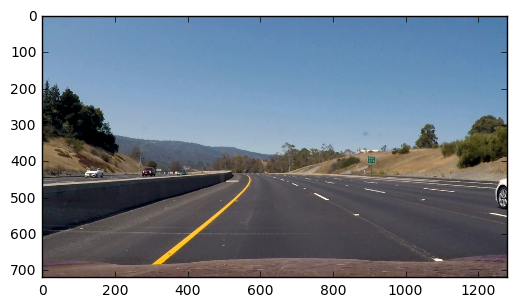

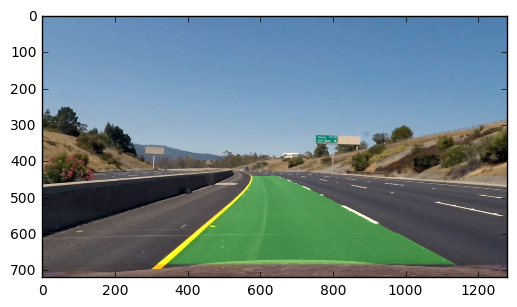

In [137]:
# Extract difficult image from extra challenge
clip1 = VideoFileClip("project_video.mp4")
image = clip1.get_frame(0)
plt.clf()
plt.imshow(extra_img)
plt.show()

result = process_image(image)
plt.clf()
plt.imshow(result)
plt.show()

[MoviePy] >>>> Building video ./output_images/project_video.mp4
[MoviePy] Writing video ./output_images/project_video.mp4



100%|█████████▉| 1260/1261 [02:08<00:00,  9.77it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_images/project_video.mp4 

CPU times: user 10min 44s, sys: 2.8 s, total: 10min 46s
Wall time: 2min 8s


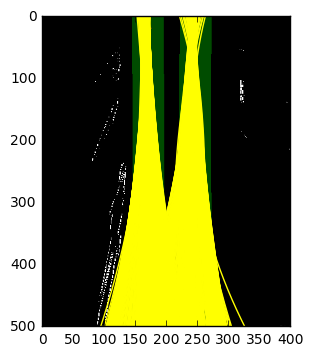

In [138]:
from moviepy.editor import VideoFileClip
video_output = './output_images/project_video.mp4'
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

%time white_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video ./output_images/challenge_video.mp4
[MoviePy] Writing video ./output_images/challenge_video.mp4



 27%|██▋       | 132/485 [00:11<00:35, 10.07it/s]

TypeError: expected non-empty vector for x

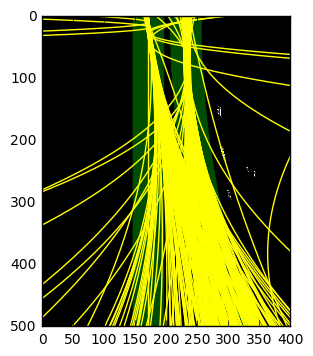


 27%|██▋       | 132/485 [00:23<01:02,  5.61it/s]

In [139]:
clip1 = VideoFileClip("challenge_video.mp4")
video_output = './output_images/challenge_video.mp4'
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

%time white_clip.write_videofile(video_output, audio=False)